Before Jason did the 2D scan with the mach probe he did a scan where he held the mach probe at a fixed position and rotated it along the x-axis for several shots. (16617-16689). The Mach probe shots start at 16594 but there are some comments indicating shots without plasma in the first few shots. 

In this notebook I will redo the Roesetta analysis of measurements from a mach probe in a fixed location and twisting the probe.

In [1]:
import sys
sys.path.append('../read_from_shotlog')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from read_from_shotlog import read_mach_settings_shotlog
import ion_current_to_mach_number as ic_to_mach
reload(ic_to_mach)

/Users/vonderlinden2/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<module 'ion_current_to_mach_number' from 'ion_current_to_mach_number.pyc'>

In [2]:
mach_settings = read_mach_settings_shotlog(16628)

In [3]:
mach_settings

{'mach_insertion': u'-',
 'mach_orientation': 0,
 'mach_orientation_read': -159,
 'mach_x': 0.02,
 'mach_x_read': -0.057,
 'mach_y': 0.001,
 'mach_z': 0.416}

First I will look at the shots 16628-16646 over which the mach probe was roatated 360 degrees at the location x=0.020m, y=0.001m, and z=0.416m.

In [154]:
shots = np.arange(16628, 16646)

angle_list = []
mach_list = []
for shot in shots:
    mach_settings = read_mach_settings_shotlog(shot)
    angle_list.append(mach_settings['mach_orientation'])
    mach, time, r_background_std, l_background_std = ic_to_mach.mach_number(shot)
    mach_list.append(mach)
angles = np.asarray(angle_list)
mach_array = np.asarray(mach_list)

In [155]:
angles_reshaped = np.reshape(np.repeat(angles, 70000), (18, 70000))

In [156]:
mach_measured_x = mach_array * np.cos(angles_reshaped)
mach_measured_y = mach_array * np.sin(angles_reshaped)

In [157]:
mach_measured_x_df = pd.DataFrame(np.swapaxes(mach_measured_x, 0, 1), index=time, columns=angles)
mach_measured_y_df = pd.DataFrame(np.swapaxes(mach_measured_y, 0, 1), index=time, columns=angles)

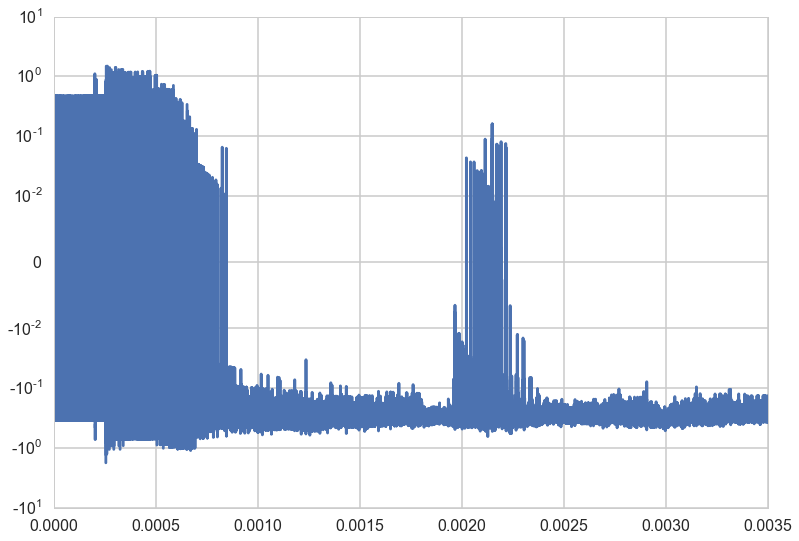

In [158]:
plt.plot(time, mach_array[0])
plt.yscale('symlog', linthreshy=0.01)
plt.show()

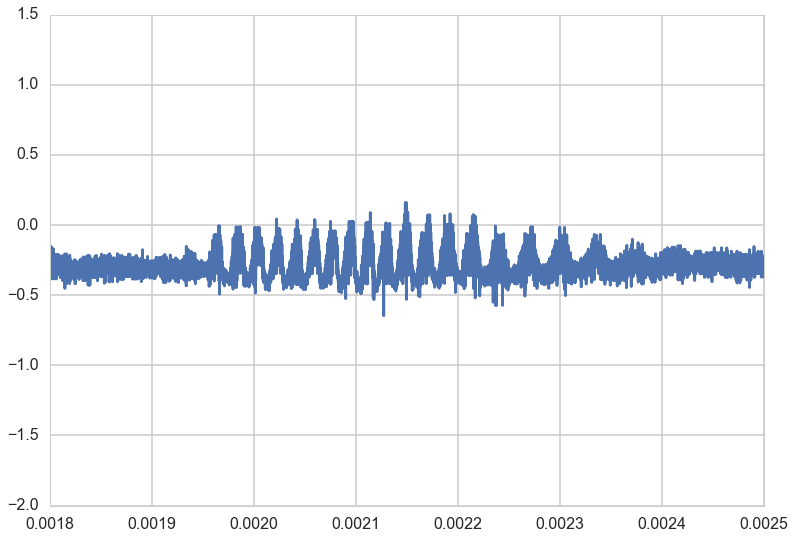

In [159]:
plt.plot(time, mach_array[0])
plt.xlim((1.8e-3, 2.5e-3))
plt.show()

In [167]:
time_point = mach_measured_x_df[0].index[44001]
print '%0.9f' % time_point 

0.002200050


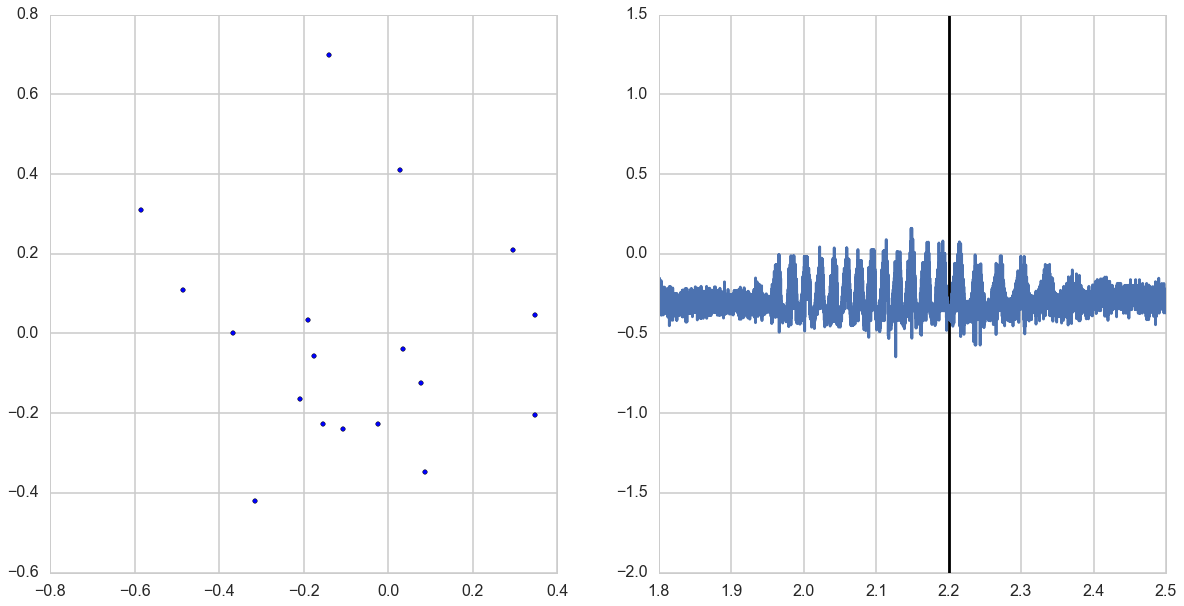

In [168]:
fig, (scatter, time_line) = plt.subplots(1, 2, figsize=(20, 10))
fig.add_subplot()
for angle in angles:
    scatter.scatter(mach_measured_x_df[angle][time_point], mach_measured_y_df[angle][time_point])
time_line.plot(time*1e3, mach_array[0])
time_line.vlines(time_point*1e3, -2, 1.5)
time_line.set_xlim((1.8, 2.5))
plt.show()